## End to End Toy project

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/placement.csv")

In [3]:
df.head(10)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [5]:
df.shape

(100, 4)

Steps

*   Step 1: preprocess+ EDA + Feature Slection
*   Step 2: Extract  input and output columns
*  Step 3: Scale the values
*  Step 4: Train Test Split
*  Step 5: Train the model
*   Step 6: Evaluate the model/ Model Slection
*  Step 7: Deploy the Model













In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
# Preprocessing
df=df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt


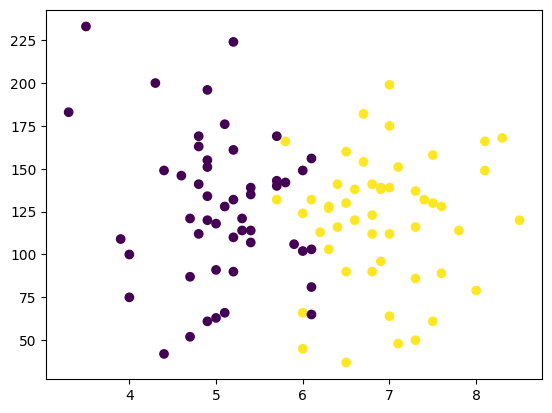

In [12]:
# EDA: It gives idea about the data.
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
# Extract the input and output columns:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [16]:
# Train, Test and Split:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [29]:
# Scaling the values:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [30]:
x_train

array([[-1.75972346e+00, -6.00655957e-01],
       [-8.75484310e-03,  6.30242171e-01],
       [ 6.91632605e-01, -2.28874482e-02],
       [ 1.74221378e+00, -1.12818373e+00],
       [-8.84239153e-01, -1.48489298e-01],
       [-5.34045429e-01, -2.48970778e-01],
       [ 1.82976221e+00,  6.30242171e-01],
       [-1.83851705e-01,  1.05728846e+00],
       [-2.19746562e+00,  2.74035325e+00],
       [ 4.28987312e-01, -2.18323926e+00],
       [-1.75972346e+00, -1.22866521e+00],
       [ 9.54277898e-01,  6.80482911e-01],
       [-7.09142291e-01,  2.51426992e+00],
       [ 2.53890450e-01, -5.25294847e-01],
       [-8.84239153e-01, -1.53010965e+00],
       [ 1.21692319e+00,  2.03195881e-01],
       [-1.40952974e+00, -2.05763742e+00],
       [ 7.87935879e-02, -1.07794299e+00],
       [-1.05933602e+00,  1.13264957e+00],
       [-2.71400136e-01,  4.04158841e-01],
       [ 3.41438881e-01,  4.29279211e-01],
       [ 4.28987312e-01, -8.51859657e-01],
       [ 1.56711692e+00, -2.48970778e-01],
       [-9.

In [31]:
x_test

array([[-0.66461853,  1.41928163],
       [-1.03385105, -1.75744982],
       [ 0.90461967, -0.2203217 ],
       [-1.12615918,  0.65071757],
       [ 1.55077657,  0.95814319],
       [ 1.36616031, -0.88641055],
       [-1.31077544,  0.72757398],
       [ 0.25846276, -1.42440539],
       [-0.38769414,  0.36891075],
       [ 0.44307902,  0.16396033]])

In [32]:
# Train the model
# from EDA we found out Logistic regression would be better.
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()


In [33]:
clf.fit(x_train,y_train)

LogisticRegression()

In [35]:
# Evaluate the model
y_pred=clf.predict(x_test)


In [36]:
y_test

,placement
15,0
94,0
93,1
39,0
91,1
90,1
88,0
56,0
49,0
70,1


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

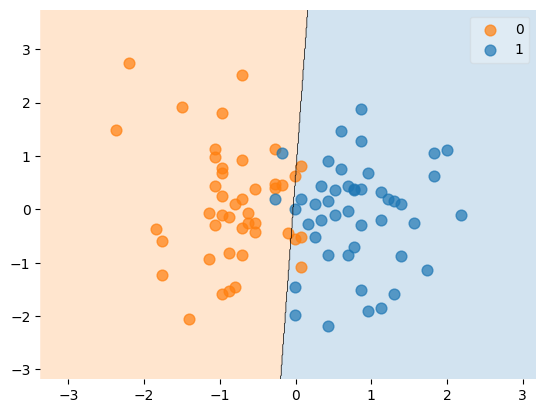

In [41]:
from mlxtend.plotting import plot_decision_regions
scatter_kwargs = {'s': 60, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
plot_decision_regions(x_train, y_train.values, clf=clf,markers="o", scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs, colors='#ff7f0e,#1f77b4')

plt.show()

In [42]:
# Export the model
import pickle
pickle.dump(clf,open('model.pkl','wb'))
